[1.0 Hadoop related questions](#hadoop) Marks: 6 <br>
[2.0 Read Data in Spark](#read) Marks 4<br>
[3.0 Exploration related questions](#exploration) Marks 25<br>
[4.0 Data aggregation and summarisation](#aggregate) Marks 25<br>
[5.0 ML  Part-I Questions](#part1) Marks 20<br>
[6.0 ML Part--II Questions](#part2) Marks 10<br>
[7.0 ML Part--III Questions](#part3) Marks 10<br>

## 0.0 Call libraries
Just execute this long cell and two others that follow. All needed packages will be called.

In [2]:
#0.0 Call all requisite libraries
# 0.0
import numpy as np
import pandas as pd

# 0.1   For transforming categorical data to integer and to dummy:
from pyspark.ml.feature import  StringIndexer, OneHotEncoder

# 0.2   For collecting all features at one place
#       A feature transformer that merges multiple columns into one vector column.
from pyspark.ml.feature import VectorAssembler

# 0.3 Scaling dataset and reducing dimesions:
from pyspark.ml.feature import StandardScaler, PCA

# 0.4   To execute all transformation operations as pipeline:
from pyspark.ml import Pipeline

# 0.5 Library for regression .
from pyspark.ml.regression import RandomForestRegressor

# 0.6  Regression & classification evaluators.
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator

# 0.7 
from pyspark.sql.functions import *

# 0.8 Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 0.9 Display multiple command outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#0.10 Increase display width of notebook:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_6396/3664636490.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<a name="hadoop"></a>
## 1.0 Hadoop related Questions

It is expected that before opening this notebook you have already started hadoop<br>

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)


In [5]:
#1.1 Make a directory 'creditcard' in hadoop under folder '/user/ashok/data_files/'                (marks 2)
#    Full dir location would, then, be '/user/ashok/data_files/creditcard/'
! hdfs dfs -mkdir -p hdfs://localhost:9000/home/ashok/Downloads/creditcard

In [6]:
#1.2 Copy  data file 'bankchurners.csv' from your Downloads                                        (marks 2)
#      folder to  hadoop folder: /user/ashok/data_files/creditcard/        
! hdfs dfs -put /home/ashok/Downloads/bankchurners.csv /home/ashok/Downloads/creditcard

put: `/home/ashok/Downloads/creditcard/bankchurners.csv': File exists


In [7]:
#1.3 Check if file is copied to hadoop folder  /user/ashok/data_files/creditcard/:                 (marks 2)
! hdfs dfs -ls /home/ashok/Downloads/creditcard

Found 1 items
-rw-r--r--   1 ashok supergroup    1000884 2022-10-11 18:55 /home/ashok/Downloads/creditcard/bankchurners.csv


<a name="read"></a>
## 2.0 Read Data in Spark

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)


In [8]:
#2.1 Read datafile bankchurners.csv into spark.                                                     (marks 2)
#   Fill in the values of the requistie parameters/arguments to read the file: 
df = spark.read.csv(path = '/home/ashok/Downloads/creditcard/bankchurners.csv',
                    header = True,
                    inferSchema = True
                    )

In [9]:
#2.2 Show dataframe, 'df', with just three rows of data:                                            (marks 2)
df.show(3)

+---------+---------+---+------+----------+----------+-------------+------+------------+---------+------------+--------------+-----------------+-----------+------------------+------------+-------------+-----------------+----------------+-------------+-----------+
|       id|attrition|age|gender|dependents| education|maritalstatus|income|cardcategory|sincewhen|contactcount|monthsinactive|contactcount12mon|creditlimit|balancerecoverable|avgopentobuy|totalamntq4q1|transactionamount|transactioncount|totalctchange|utilization|
+---------+---------+---+------+----------+----------+-------------+------+------------+---------+------------+--------------+-----------------+-----------+------------------+------------+-------------+-----------------+----------------+-------------+-----------+
|768805383|       no| 45|     m|         3|highSchool|      married|level2|        blue|       39|           5|             1|                3|    12691.0|               777|     11914.0|        1.335|      

<a name="exploration"></a>
## 3.0 Exploration related questions

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)



In [10]:
# 3.0 As the above display is overlapping, show first 10 columns                                     (marks 2)
#     of 'df' and show just 3-rows
df.select(df.columns[:10]).show(3)

# 3.1 Then, write code to display next 6 columns:                                                    (marks 2)
df.select(df.columns[10:16]).show(3)

# 3.2 Then, write code to display rest of the  columns:                                              (marks 2)
df.select(df.columns[16:]).show(3)

+---------+---------+---+------+----------+----------+-------------+------+------------+---------+
|       id|attrition|age|gender|dependents| education|maritalstatus|income|cardcategory|sincewhen|
+---------+---------+---+------+----------+----------+-------------+------+------------+---------+
|768805383|       no| 45|     m|         3|highSchool|      married|level2|        blue|       39|
|818770008|       no| 49|     f|         5|  graduate|       single|level0|        blue|       44|
|713982108|       no| 51|     m|         3|  graduate|      married|level3|        blue|       36|
+---------+---------+---+------+----------+----------+-------------+------+------------+---------+
only showing top 3 rows

+------------+--------------+-----------------+-----------+------------------+------------+
|contactcount|monthsinactive|contactcount12mon|creditlimit|balancerecoverable|avgopentobuy|
+------------+--------------+-----------------+-----------+------------------+------------+
|     

In [11]:
# 3.3 Print the schema of DataFrame, df:                                                             (marks 1)
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- attrition: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- dependents: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- maritalstatus: string (nullable = true)
 |-- income: string (nullable = true)
 |-- cardcategory: string (nullable = true)
 |-- sincewhen: integer (nullable = true)
 |-- contactcount: integer (nullable = true)
 |-- monthsinactive: integer (nullable = true)
 |-- contactcount12mon: integer (nullable = true)
 |-- creditlimit: double (nullable = true)
 |-- balancerecoverable: integer (nullable = true)
 |-- avgopentobuy: double (nullable = true)
 |-- totalamntq4q1: double (nullable = true)
 |-- transactionamount: integer (nullable = true)
 |-- transactioncount: integer (nullable = true)
 |-- totalctchange: double (nullable = true)
 |-- utilization: double (nullable = true)



In [12]:
# 3.4 What information does this schema tell you?                                                   (marks 1)


In [13]:
# 3.5 What are the data types of features?                                                           (marks 2)
df.dtypes

[('id', 'int'),
 ('attrition', 'string'),
 ('age', 'int'),
 ('gender', 'string'),
 ('dependents', 'int'),
 ('education', 'string'),
 ('maritalstatus', 'string'),
 ('income', 'string'),
 ('cardcategory', 'string'),
 ('sincewhen', 'int'),
 ('contactcount', 'int'),
 ('monthsinactive', 'int'),
 ('contactcount12mon', 'int'),
 ('creditlimit', 'double'),
 ('balancerecoverable', 'int'),
 ('avgopentobuy', 'double'),
 ('totalamntq4q1', 'double'),
 ('transactionamount', 'int'),
 ('transactioncount', 'int'),
 ('totalctchange', 'double'),
 ('utilization', 'double')]

In [14]:
# 3.6 Write code(s) to find out as to                                                                 (marks 2)
#      how many rows and how many columns exist?                                           
#rows
print('no. of rows:', df.count())
#columns
print('no. of cols:', len(df.columns))

no. of rows:  10127
no. of cols: 21


In [15]:
# 3.7 Summarise and show statistical information for all columns:                                    (marks 2)
df.describe(df.columns[:10]).show()
df.describe(df.columns[10:16]).show()
df.describe(df.columns[16:]).show()

+-------+-------------------+---------+-----------------+------+------------------+---------+-------------+-------+------------+------------------+
|summary|                 id|attrition|              age|gender|        dependents|education|maritalstatus| income|cardcategory|         sincewhen|
+-------+-------------------+---------+-----------------+------+------------------+---------+-------------+-------+------------+------------------+
|  count|              10127|    10127|            10127| 10127|             10127|    10127|        10127|  10127|       10127|             10127|
|   mean|7.391776063336625E8|     null|46.32596030413745|  null|2.3462032191172115|     null|         null|   null|        null|35.928409203120374|
| stddev|3.690378345023116E7|     null|8.016814032549046|  null|  1.29890834890379|     null|         null|   null|        null|  7.98641633087208|
|    min|          708082083|       no|               26|     f|                 0|  college|     divorced| leve

In [16]:
# 3.8 'attrition' column has two values: 'yes' and 'no'                                             (marks 4)
#      Show their distribution (ie value counts)
df.groupby('attrition').count().show()

+---------+-----+
|attrition|count|
+---------+-----+
|       no| 8500|
|      yes| 1627|
+---------+-----+



In [17]:
# 3.9 From the Spark DataFrame,df, extract just                                                     (marks: 3)
#     two columns: 'age' and 'creditlimit'.             
#     Convert the extracted DataFrame to pandas DataFrame.
abc = df.select(['age','creditlimit'])
pnd = abc.toPandas()

pnd.head(2)

,age,creditlimit
0,45,12691.0
1,49,8256.0


<AxesSubplot:xlabel='creditlimit', ylabel='age'>

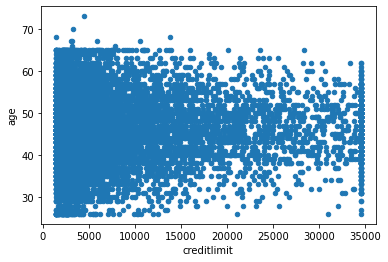

In [18]:
# 3.10 Use pandas DataFrame from the above question (#3.9),                                         (marks 2)
#   to plot a chart between 'creditlimit' and 'age':
pnd.plot.scatter(x='creditlimit' , y= 'age')

In [19]:
# 3.11 Write in one sentence your observation from the above chart:                                (marks 2)


<a name="aggregate"> </a>
## 4.0 Data aggregation and summarisation
You can attempt this section even after Machine Learning parts below


&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)


In [20]:
#  There are six categorical columns. 
#  And fourteen numeric columns. 
#  There is one ID column 
cat_col = ['attrition','gender','maritalstatus','education','income','cardcategory']
num_col = ['age','dependents','sincewhen', 'contactcount', 'monthsinactive', 'contactcount12mon',
           'creditlimit','balancerecoverable','avgopentobuy',
           'totalamntq4q1','transactionamount','transactioncount','totalctchange','utilization']

In [21]:
# 4.1 Group by any one of the six categorical columns                                               (marks 7)
#       and find mean of all numeric columns:              
df.groupby('attrition').avg('age','dependents','sincewhen', 'contactcount', 'monthsinactive',
                            'contactcount12mon','creditlimit').show()
df.groupby('attrition').avg('balancerecoverable','avgopentobuy','totalamntq4q1','transactionamount',
                            'transactioncount','totalctchange').show()
df.groupby('attrition').avg('utilization').show()

+---------+------------------+------------------+------------------+------------------+-------------------+----------------------+-----------------+
|attrition|          avg(age)|   avg(dependents)|    avg(sincewhen)| avg(contactcount)|avg(monthsinactive)|avg(contactcount12mon)| avg(creditlimit)|
+---------+------------------+------------------+------------------+------------------+-------------------+----------------------+-----------------+
|       no| 46.26211764705882|2.3354117647058823| 35.88058823529412|3.9145882352941177|  2.273764705882353|    2.3563529411764708|8726.877517646963|
|      yes|46.659496004917024| 2.402581438229871|36.178242163491085| 3.279655808236017|  2.693300553165335|     2.972341733251383| 8136.03945912722|
+---------+------------------+------------------+------------------+------------------+-------------------+----------------------+-----------------+

+---------+-----------------------+-----------------+------------------+----------------------+----------

In [22]:
# 4.2 Group by any two of categorical columns                                                       (marks 8)
#     and find mean of all numeric columns
df.groupby('attrition','gender').avg('age','dependents','sincewhen', 'contactcount', 'monthsinactive',
                                     'contactcount12mon').show()
df.groupby('attrition','gender').avg('creditlimit','balancerecoverable','avgopentobuy','totalamntq4q1',
                                     'transactionamount').show()
df.groupby('attrition','gender').avg('transactioncount','totalctchange','utilization').show()

+---------+------+------------------+------------------+------------------+------------------+-------------------+----------------------+
|attrition|gender|          avg(age)|   avg(dependents)|    avg(sincewhen)| avg(contactcount)|avg(monthsinactive)|avg(contactcount12mon)|
+---------+------+------------------+------------------+------------------+------------------+-------------------+----------------------+
|      yes|     f|46.623655913978496|2.3731182795698924|36.151612903225804|3.3989247311827957|  2.689247311827957|     2.935483870967742|
|       no|     m|46.088408644400786| 2.337180746561886| 35.81286836935167|  3.93713163064833| 2.2659626719056973|     2.413310412573674|
|      yes|     m|46.707317073170735| 2.441893830703013| 36.21377331420373|  3.12051649928264| 2.6987087517934003|    3.0215208034433285|
|       no|     f| 46.42186088527552|2.3337850045167117| 35.94286359530262|3.8938572719060525|  2.280939476061427|     2.303974706413731|
+---------+------+----------------

In [23]:
# 4.3 Group by any one of the six categorical columns.                                              (marks 5)
#     Find mean of just one numeric column 
#     and max of any other numeric column:
df.groupby('attrition').agg({'age':'avg'}).show()
df.groupby('attrition').agg({'age':'max'}).show()

+---------+------------------+
|attrition|          avg(age)|
+---------+------------------+
|       no| 46.26211764705882|
|      yes|46.659496004917024|
+---------+------------------+

+---------+--------+
|attrition|max(age)|
+---------+--------+
|       no|      73|
|      yes|      68|
+---------+--------+



In [24]:
# 4.4 Group by any TWO of the six categorical columns.                                              (marks 5)
#     Find mean of any one numeric column 
#     and max of any other numeric column:
df.groupby('attrition','gender').agg({'age':'avg','dependents':'max'}).show()

+---------+------+---------------+------------------+
|attrition|gender|max(dependents)|          avg(age)|
+---------+------+---------------+------------------+
|      yes|     f|              5|46.623655913978496|
|       no|     m|              5|46.088408644400786|
|      yes|     m|              5|46.707317073170735|
|       no|     f|              5| 46.42186088527552|
+---------+------+---------------+------------------+



<a name="part1"></a>
## 5. Machine Learning
## Part--I  Questions
We perform a regression problem<br>
Our target column is: <span style="color:red">**'creditlimit'**</span> 


&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)


In [25]:
# We work with NUMERIC COLUMNS only
# Target column:  'creditlimit' 

In [40]:
# 5.0 Rename the target column: 'creditlimit' ,  as 'label'                                       (marks: 2)
#     (Use .withColumnRenamed() )
df = df.withColumnRenamed('creditlimit','label')

In [41]:
# 5.1 List of all numeric columns (after above renaming of 'creditlimit') 
#     is here:
cols = ['age','dependents', 'sincewhen', 'contactcount','monthsinactive',
        'contactcount12mon', 'balancerecoverable', 'avgopentobuy', 'totalamntq4q1', 
        'transactionamount','transactioncount','totalctchange', 'utilization', 'label']

# 5.0.1 How many numeric columns (including 'label') are here?
len(cols)

14

In [62]:
# 5.2 Split dataset, df, into 80:20 ratio                                                         (marks: 2 )                                                            
#     to get train, test. Use function(randomSplit()
train, test = df.randomSplit([0.8,0.2])

In [63]:
# 5.3 Among the 13+1 numeric features,                                                              (marks 2)
#     Select any five (or more) numeric features for ML-operation.
#     Exclude 'label' from this group of five.
#     Write your selected five (or more) numeric features in the list below
#     (each column name should be written within inverted commas)
num_cols = ['age', 'dependents', 'utilization' ,'transactioncount','totalctchange' ]        

In [64]:
# 5.4 Use VectorAssembler class to assemble the selected                                           (marks 2)
#     five features.
#     Instantiate VectorAssembler object to produce 'vc'
vc = VectorAssembler(inputCols = num_cols,
                    outputCol = 'features'
                    )

In [65]:
# 5.5 Use vc to transform() the train and test datasets                                              (marks 3)
#     
train = vc.transform(train)
test  = vc.transform(test)

In [66]:
# 5.6 Instantiate RandomForestRegressor()                                                           (marks 3)
#      to produce RandomForestRegressor object, say, 'rf'
rf = RandomForestRegressor()

In [67]:
# 5.7 Fit the rf object on the 'train'                                                               (marks 2)
#     (outputted from #5,5) to produce a model object:
model = rf.fit(train)

In [68]:
# 5.8 Use the 'model' object to predict test data:                                                    (marks 2)
predicted = model.transform(test)

predicted.select(predicted.columns[:10]).show(3)
predicted.select(predicted.columns[10:16]).show(3)
predicted.select(predicted.columns[16:]).show(3)

+---------+---------+---+------+----------+---------+-------------+-------+------------+---------+
|       id|attrition|age|gender|dependents|education|maritalstatus| income|cardcategory|sincewhen|
+---------+---------+---+------+----------+---------+-------------+-------+------------+---------+
|708139833|      yes| 40|     m|         3| graduate|      unknown| level2|        blue|       30|
|708147108|       no| 26|     m|         0| graduate|     divorced|unknown|        blue|       36|
|708154833|      yes| 39|     f|         2| graduate|       single| level0|        blue|       27|
+---------+---------+---+------+----------+---------+-------------+-------+------------+---------+
only showing top 3 rows

+------------+--------------+-----------------+-------+------------------+------------+
|contactcount|monthsinactive|contactcount12mon|  label|balancerecoverable|avgopentobuy|
+------------+--------------+-----------------+-------+------------------+------------+
|           4|    

In [71]:
# 5.9 Evaluate modeling results                                                                        (marks 2)
#     Calculate rmse:
evaluator = RegressionEvaluator(metricName = "rmse")
evaluator.evaluate(predicted)

evaluator = RegressionEvaluator(metricName = "r2")
evaluator.evaluate(predicted)

6226.6641978902035

0.5338241344240469

<a name="part2"></a>
## 6.0 ML, Part--II Questions
Pipelinig

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)


In [72]:
# 6.0 Drop 'features' column, if, created earlier:                                                  
train = train.drop('features')
test = test.drop('features')

In [73]:
# 6.1 Write a pipeline to carry-out the above operations (ie in Part--I)                           (marks 5)
#     Your pipeline will contain a VectorAssembler object
#     and a RandomForestRegressor() object.
pipe1 = Pipeline(
                  stages = [
                            VectorAssembler
                            (inputCols = num_cols ,
                            outputCol = 'features'),
                            
                            RandomForestRegressor()
                            ]                  
                )

In [74]:
# 6.2 Fit the pipe ('pipe1') over 'train' data and create a model object:                           (marks 2)
model1 = pipe1.fit(train)

In [76]:
# 6.3 Make predictions for the test dataset using the 'model1' object:                              (marks 2)
predicted1 = model1.transform(test)

Exception ignored in: <function JavaWrapper.__del__ at 0x7fe7d068a8b0>
Traceback (most recent call last):
  File "/opt/spark-3.3.0-bin-hadoop3/python/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'RegressionEvaluator' object has no attribute '_java_obj'


In [77]:
# 6.4 Evaluate results of modeling                                                                   (marks 1)
#     Calculate 'rmse' :
evaluator = RegressionEvaluator(metricName = "rmse")
evaluator.evaluate(predicted1)

evaluator = RegressionEvaluator(metricName = "r2")
evaluator.evaluate(predicted1)

6226.6641978902035

0.5338241344240469

<a name="part3"></a>
## 7.0 ML, Part--III Questions

`StandardScaler()` syntax is [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StandardScaler.html)<br>
`PCA()` syntax is [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.PCA.html)<br>
Both packages have already been called. No need to call them again


&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Go to [top](#top)


In [132]:
# 7.0 Drop any 'features' column created earlier:
train = train.drop('features')
test = test.drop('features')

In [133]:
# 7.1 Rewrite the pipeline created in  #6.1 to include, StandardScaler() & PCA()                (marks 5)
#     When writing PCA object select a value of 'k' either 3 or 4
pipe2 = Pipeline(
                  stages = [
                      VectorAssembler
                            (inputCols = num_cols,
                            outputCol = 'pre_features'), 
                      
                      StandardScaler(
                            inputCol = 'pre_features',
                            outputCol = 'features'),
                            
                      PCA(k=3, inputCol = 'features', outputCol = 'pcafeatures')
                           ]
              )

In [152]:
# 7.2  Fit the pipe (pioe2) over 'train' data and create a 'model2' object:                         (marks 2)
model2 = pipe2.fit(train)

In [157]:
# 7.3 Make predictions for the 'test' dataset using the 'model2' object:                            (marks 2)
predicted2 = model2.transform(test)

In [158]:
# 7.4 Evaluate results of modeling                                                                  (marks 1)
#     Calculate 'rmse' :
predicted2.select(predicted2.columns[:10]).show(3)
predicted2.select(predicted2.columns[10:16]).show(3)
predicted2.select(predicted2.columns[16:]).show(3)

+---------+---------+---+------+----------+---------+-------------+-------+------------+---------+
|       id|attrition|age|gender|dependents|education|maritalstatus| income|cardcategory|sincewhen|
+---------+---------+---+------+----------+---------+-------------+-------+------------+---------+
|708139833|      yes| 40|     m|         3| graduate|      unknown| level2|        blue|       30|
|708147108|       no| 26|     m|         0| graduate|     divorced|unknown|        blue|       36|
|708154833|      yes| 39|     f|         2| graduate|       single| level0|        blue|       27|
+---------+---------+---+------+----------+---------+-------------+-------+------------+---------+
only showing top 3 rows

+------------+--------------+-----------------+------------------+------------+-------------+
|contactcount|monthsinactive|contactcount12mon|balancerecoverable|avgopentobuy|totalamntq4q1|
+------------+--------------+-----------------+------------------+------------+-------------+


In [ ]:
########### END #############################